In [0]:
import tensorflow as tf

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, strides = (2, 2), activation = 'elu', input_shape = (28, 28, 1)),
                             tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, strides = (2, 2), activation = 'elu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation = 'elu'),
                             tf.keras.layers.Dense(7 * 7 * 64, activation = 'elu'),
                             tf.keras.layers.Reshape(target_shape = (7, 7, 64)),
                             tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = 2, strides = (2, 2), padding = 'same', activation = 'elu'),
                             tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 2, strides = (2, 2), padding = 'same', activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'mse')

# 9.3.1 - K-평균 클러스터링

In [7]:
# 예제 9.11 : 잠재변수 추출 모델 정의 및 실행
latent_vector_model = tf.keras.Model(inputs = model.input, outputs = model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)

print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[-1.11453950e-01  2.68101655e-02 -3.15584540e-02  1.44499943e-01
 -7.26928115e-02  7.94545561e-03 -9.95164514e-02 -4.03414369e-02
 -1.04281783e-01  7.41773397e-02 -2.87138224e-02 -3.98869514e-02
 -1.46090984e-04 -1.22568846e-01 -6.48709536e-02 -8.51710439e-02
  7.52295554e-03  6.48885686e-03  3.08268387e-02 -6.41145706e-02
 -7.14147091e-02 -1.64460480e-01  4.64484543e-02  2.71633063e-02
 -6.06303811e-02 -2.59184837e-02 -3.89901996e-02  6.93721920e-02
  1.84275098e-02  5.44037670e-04  2.91903466e-02 -8.24115872e-02
 -3.10147405e-02 -2.00718641e-03 -1.58533692e-01 -1.41644835e-01
  8.01367983e-02 -3.93813848e-02 -2.47629881e-02  3.38544026e-02
 -3.22952271e-02 -1.56045556e-02  2.23353103e-01 -7.32362866e-02
 -7.94609189e-02 -2.87954807e-02  4.57718223e-02  9.33672786e-02
 -9.49646831e-02 -1.21978700e-01 -5.11920452e-03 -2.53998637e-02
  1.71765774e-01  1.55038983e-02 -2.90355086e-02 -2.82368064e-02
 -3.79275084e-02 -4.79732156e-02 -1.22238696e-01  6.39730617e-02
  5.50183281e

### 셀의 수행 시간 측정
Wall time : 실제로 걸린 시간  
CPU time : 멀티 코어를 사용할 경우에 모든 코어의 계산 시간을 합쳐서 표시

In [8]:
# 예제 9.12 : 사이킷런의 K-평균 클러스터링 알고리즘 사용
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, n_init = 10, random_state = 42)
kmeans.fit(latent_vector)

CPU times: user 14.6 s, sys: 3.24 s, total: 17.8 s
Wall time: 13.8 s


In [9]:
# 예제 9.13 : 계산 결과 확인
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[4 3 7 ... 1 1 1]
(10, 64)
[ 0.02073821  0.04780045  0.01295401  0.04911898 -0.06401281  0.05696894
 -0.06498612  0.01763669 -0.01774355 -0.00581259 -0.00394473  0.03306825
 -0.01683442  0.0393884   0.01684555  0.02388908 -0.0021589   0.01159397
 -0.01282358  0.00470601 -0.06326491 -0.0852118   0.11426232 -0.10280161
 -0.02375942  0.03549695  0.0017444   0.01018824 -0.03350069  0.0046043
  0.01410903  0.00555184  0.04169682 -0.01123802 -0.10414658 -0.0333675
  0.03503054  0.03146983 -0.02666852  0.00939971  0.00198826 -0.04016022
  0.1403038  -0.01700528 -0.00022203 -0.01058821 -0.01579296 -0.01529565
 -0.00627195  0.02583624  0.00537269 -0.02375435  0.03957474  0.03596665
 -0.0027019   0.01260361  0.03299181 -0.03104903  0.02975659 -0.03583481
 -0.07681858  0.06483086  0.02496541 -0.03849164]


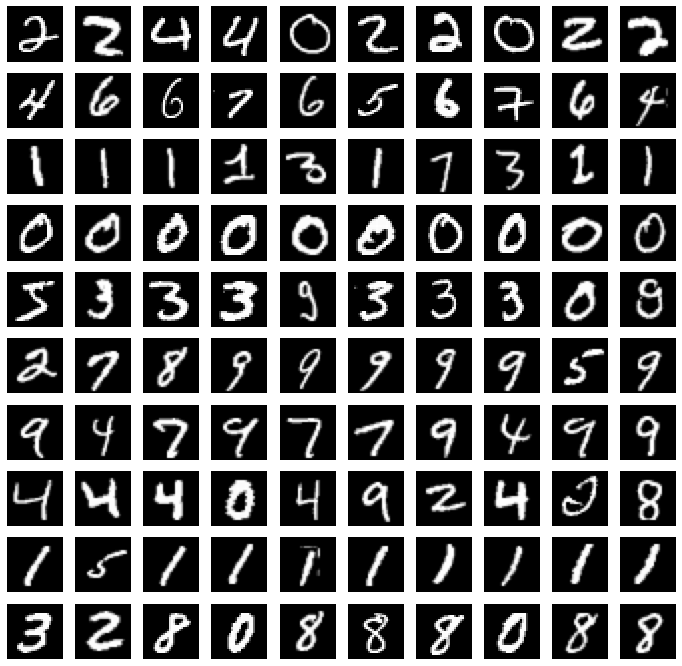

In [11]:
# 예제 9.14 : 클러스터링 결과 출력
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

for i in range(10):
  images = train_X[kmeans.labels_ == i]

  for c in range(10):
    plt.subplot(10, 10, i * 10 + c + 1)
    plt.imshow(images[c].reshape(28, 28), cmap = 'gray')
    plt.axis('off')

plt.show()

# 9.3.2 - t-SNE

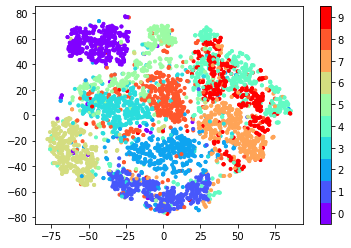

CPU times: user 1min 5s, sys: 260 ms, total: 1min 5s
Wall time: 35.2 s


In [13]:
# 예제 9.15 : 사이킷런의 t-SNE 사용
%%time
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components = 2, learning_rate = 100, perplexity = 15, random_state = 0)
tsne_vector = tsne.fit_transform(latent_vector[: 5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker = '.', c = train_Y[: 5000], cmap = cmap)
cb = plt.colorbar(fig, ticks = range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

n_components : 저차원 수  
perplexity : 알고리즘 계산에서 고려할 최근접 이웃의 숫자  
random_state : 랜덤 초기화 숫자

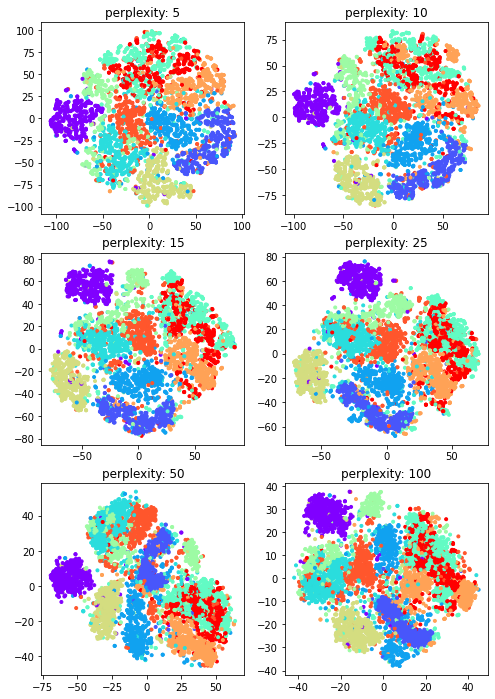

CPU times: user 8min 3s, sys: 1.58 s, total: 8min 4s
Wall time: 4min 16s


In [14]:
# 예제 9.16 : 다양한 perplexity 인수에 대한 t-SNE 결과
%%time

perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize = (8, 12))

for c in range(6):
  tsne = TSNE(n_components = 2, learning_rate = 100, perplexity = perplexities[c], random_state = 0)
  tsne_vector = tsne.fit_transform(latent_vector[: 5000])

  plt.subplot(3, 2, c + 1)
  plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker = '.', c = train_Y[: 5000], cmap = 'rainbow')
  plt.title('perplexity: {0}'.format(perplexities[c]))

plt.show()


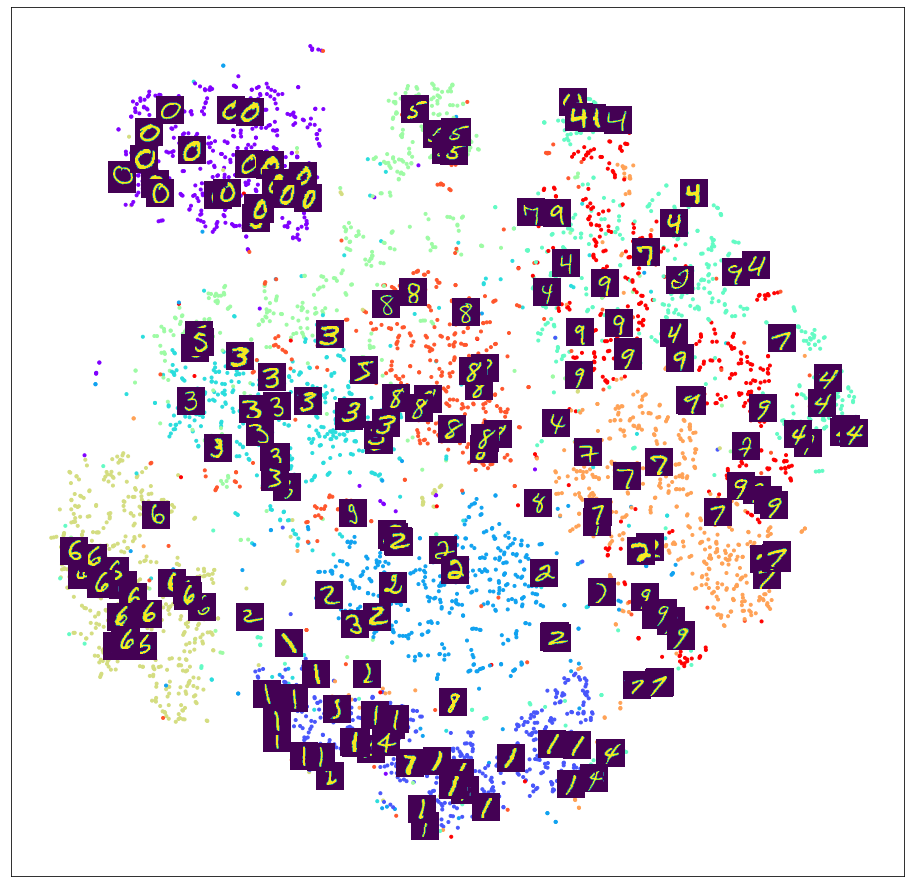

In [16]:
# 예제 9.17 : t-SNE 클러스터 위에 MNIST 이미지 표시
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize = (16, 16))

tsne = TSNE(n_components = 2, learning_rate = 100, perplexity = 15, random_state = 0)
tsne_vector = tsne.fit_transform(latent_vector[: 5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker = '.', c = train_Y[: 5000], cmap = 'rainbow')

for i in range(200):
  imagebox = OffsetImage(train_X[i].reshape(28, 28))
  ab = AnnotationBbox(imagebox, (tsne_vector[i, 0], tsne_vector[i, 1]), frameon = False, pad = 0.0)
  ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()